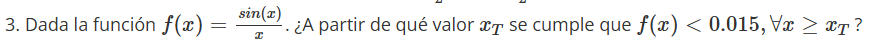

El valor mínimo x_T a partir del cual f(x) < 0.015 ∀ x ≥ x_T es aproximadamente: x_T ≈ 64.6535


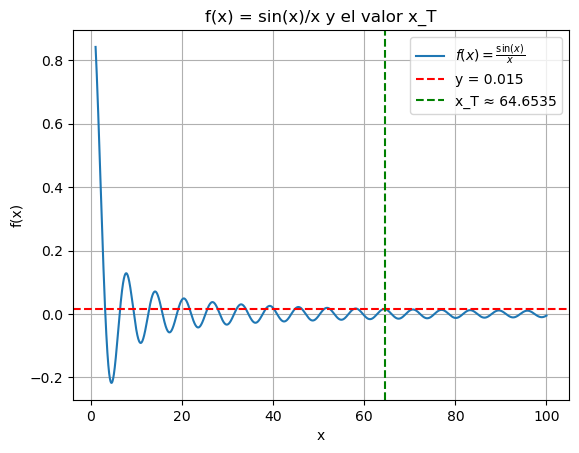

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# Definición de la función
def f(x):
    return np.sin(x)/x

# Buscar el valor de x_T tal que f(x) cruza por debajo de 0.015 y no vuelve a subir
# Usamos búsqueda en un intervalo amplio
x_vals = np.linspace(1, 100, 10000)
y_vals = f(x_vals)

# Encuentra el primer x donde f(x) < 0.015 y se mantiene así
x_T = None
for i, y in enumerate(y_vals):
    if y < 0.015 and np.all(y_vals[i:] < 0.015):
        x_T = x_vals[i]
        break

# Mostrar resultado
print(f"El valor mínimo x_T a partir del cual f(x) < 0.015 ∀ x ≥ x_T es aproximadamente: x_T ≈ {x_T:.4f}")

# Graficar
plt.plot(x_vals, y_vals, label=r'$f(x) = \frac{\sin(x)}{x}$')
plt.axhline(0.015, color='red', linestyle='--', label='y = 0.015')
plt.axvline(x_T, color='green', linestyle='--', label=f'x_T ≈ {x_T:.4f}')
plt.title('f(x) = sin(x)/x y el valor x_T')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
